In [1]:
%matplotlib inline
import numpy as np
import pysal as ps
import random as rdm
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import json
import geojson as gj
#import folium as fl
#from pysal.contrib.viz import folium_mapping as fm
from pylab import rcParams
rcParams['figure.figsize'] = 20,20


from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

Import data

Import ACS data from csv, set geoid as the index, and drop non-included variables

In [ ]:
la_acs = pd.csv(la_acs.csv)
la_acs = la_acs.rename(index=str, columns={'GEO.id':'geoid', acs_est_name:'est', acs_moe_name:'moe'})
la_acs.set_index(la_acs.geoid, inplace=True)
la_acs = la_acs.drop('geoid', axis=1)



[]

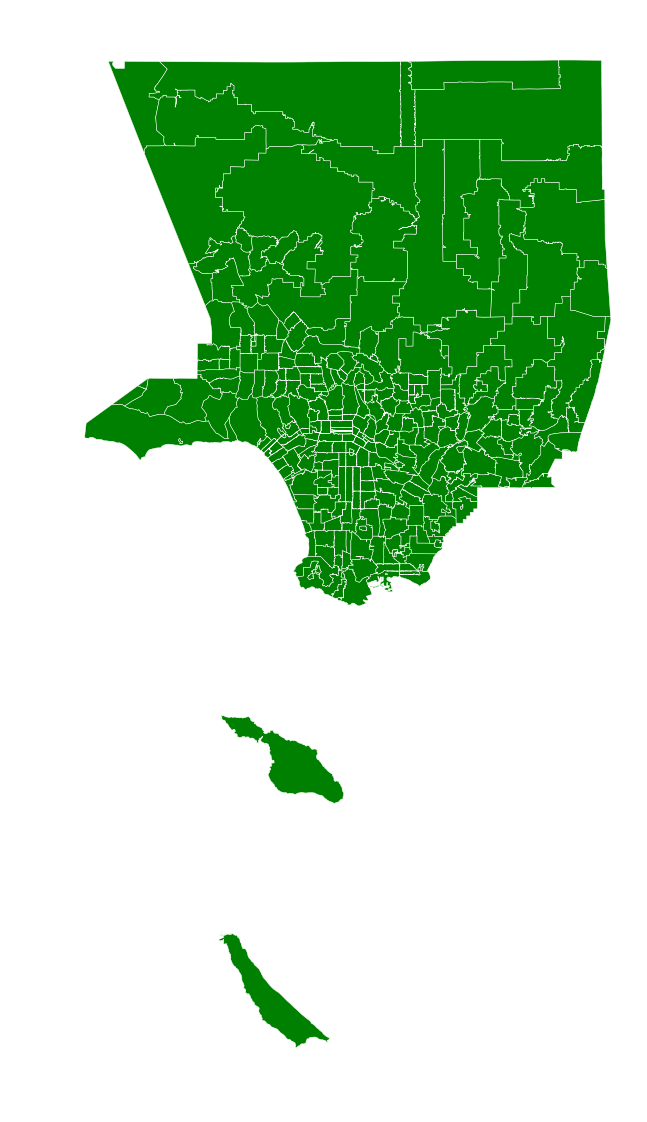

In [3]:
la_geog = gpd.read_file('CAMS_ZIPCODE_STREET_SPECIFIC/CAMS_ZIPCODE_STREET_SPECIFIC.shp')
la_geog['constant'] = 1
p = la_geog.plot(color='green', linewidth=0.5, edgecolor='white')
p.axis('off')
p.plot()

In [ ]:
k_vals = np.arrange(3, 7)
models = [GaussianMixture(k, random_state = 1234).fit(X) for k in k_vals]

plt.plot(k_vals, [m.bic(X) for m in models], label = 'BIC')
plt.plot(k_vals, [m.aic(X) for m in models], label = 'AIC')

In [ ]:
errors = []
k_vals = np.arrange(3, 7)
for k in k_vals:
    kmeans_model = KMeans(n_clusters = k, init = 'k-means++').fit(X)
    errors.append(sum(min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis = 1))/X.shape[0])
plt.plot(k_vals, errors, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Errors')
plt.title('Elbow Method for Finding Optimal k')
plt.show()

In [ ]:
clusterer_k = KMeans(n_clusters=3, init = 'k-means++', random_state=1234)
cluster_labels_k = clusterer_k.fit_predict(X)

clusterer_GMM = GaussianMixture(k, random_state = 1234)
cluster_labels_gmm = clusterer_GMM.fit(X)


In [ ]:
la_geog['cluster_k'] = cluster_labels_k
p = la_geog.plot(column='cluster_k', linewidth=0.5, edgecolor='white')
p.axis('off')
p.plot()

In [ ]:
la_geog['cluster_gmm'] = cluster_labels_gmm
p = la_geog.plot(column='cluster_gmm', linewidth=0.5, edgecolor='white')
p.axis('off')
p.plot()